In [101]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from skimage.feature import hog, orb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils.vis_utils import plot_model

# Helper Functions

In [82]:
def performPredictions(model,data):
    """
    This function takes model and data 
    perform prediction on the provided data and
    return result
    """
    predictions=model.predict(data)
    return predictions
    
def imshow(image, title=None):
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, 'gray')
    plt.show()
def showGridImage(images, labels, gsize=5,title=None):
    '''
    Function shows Multiple images.
    params: 
    images--> [Req] array of images flatten to 100*100
    labels --> [Req] array of labels (image class)
    gsize --> [opt, default=5] size for the grid gsize x gsize
    title --> [opt, default=None] title for the grid
    '''
    selected_indices = np.random.choice(len(images), size=gsize*gsize, replace=False)

    # Create a 5x5 grid for subplots
    fig, axes = plt.subplots(gsize,gsize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selected_indices[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

## HOG
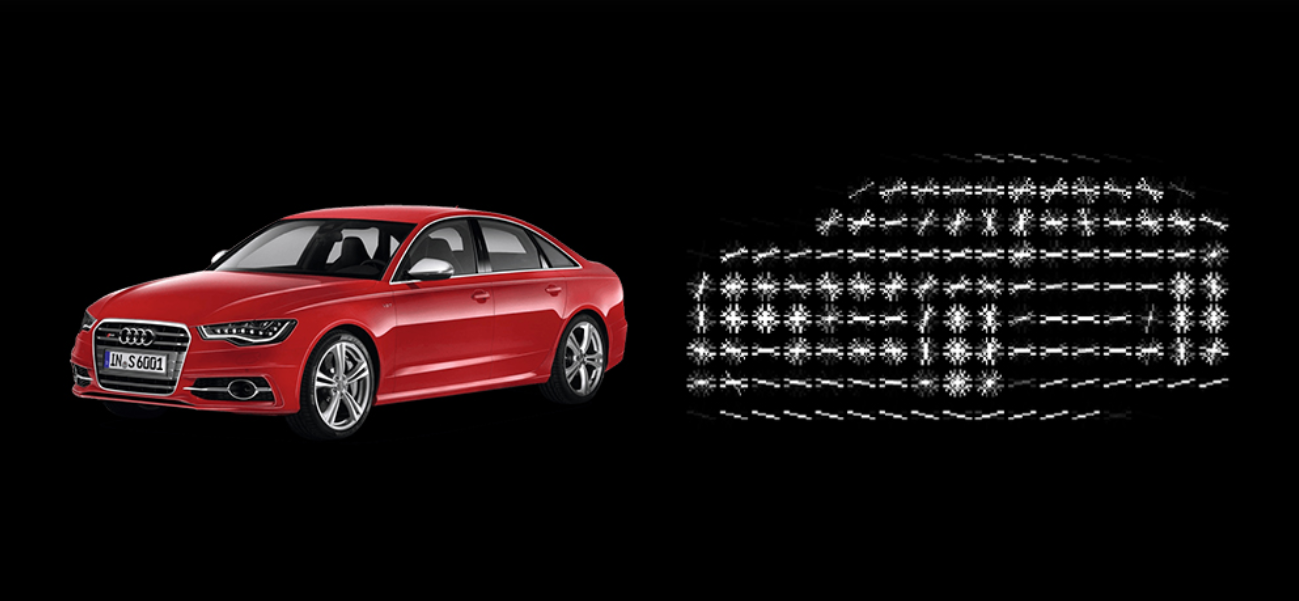

# Loading Dataset and extracting features using hog

In [79]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
hogImages = []
hogFeatures = []
labels = []
images=[]
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        images.append(image)
        features, hogImage = hog(image, visualize=True)
        hogImages.append(hogImage)
        hogFeatures.append(features)
        label = classes.index(cls)
        labels.append(label)

# Converting to numpy arrays

In [20]:
hogFeatures = np.array(hogFeatures)
labels = np.array(labels)
hogImages = np.array(hogImages)

# Showing images from dataset

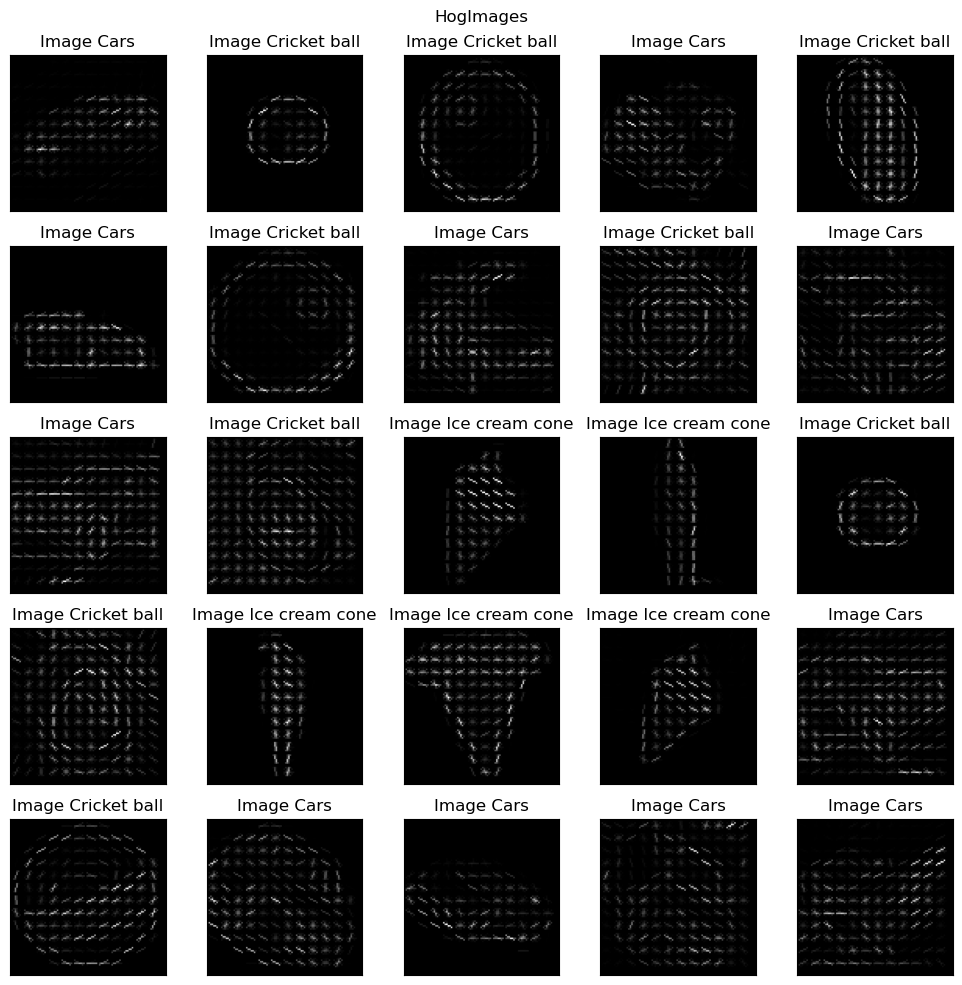

In [21]:
showGridImage(hogImages, labels, title='HogImages')

# Train_test_Split
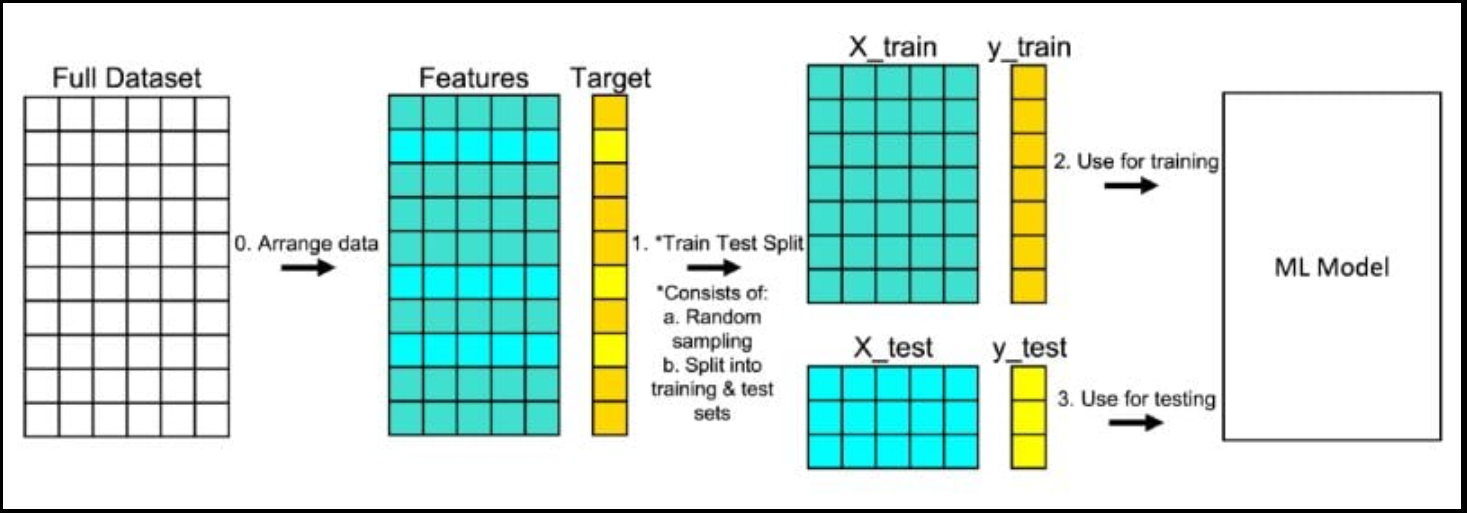

In [33]:
hogFeatures = hogFeatures.reshape((len(hogFeatures), -1))

In [38]:
hogFeatures.shape

(987, 8100)

# Spliting into train and test

In [98]:
xTrain, xTest, yTrain, yTest = train_test_split(hogFeatures, labels, test_size=0.2, random_state=42)
hogTrainImages, HogTestImages, hogTrainLabels, hogTestLabels = train_test_split(hogImages, labels, test_size=0.2, random_state=42)
TrainImages, TestImages, TrainLabels, TestLabels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [99]:
yTrain = to_categorical(yTrain)
yTest = to_categorical(yTest)

In [39]:


model = Sequential()
model.add(Dense(100, input_dim=xTrain.shape[1], activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               810100    
                                                                 
 dense_16 (Dense)            (None, 3)                 303       
                                                                 
Total params: 810,403
Trainable params: 810,403
Non-trainable params: 0
_________________________________________________________________


# calculating Parameters
# input*Number of nodes
## 100*8100+100=810100

In [40]:
#training the model
history = model.fit(xTrain, yTrain, epochs=20, batch_size=64, validation_data=(xTest, yTest))

Epoch 1/20
13/13 [==============================] - 1s 24ms/step - loss: 0.6313 - accuracy: 0.7224 - val_loss: 0.3470 - val_accuracy: 0.8687
Epoch 2/20
13/13 [==============================] - 0s 13ms/step - loss: 0.2181 - accuracy: 0.9290 - val_loss: 0.2441 - val_accuracy: 0.9040
Epoch 3/20
13/13 [==============================] - 0s 13ms/step - loss: 0.1049 - accuracy: 0.9670 - val_loss: 0.1953 - val_accuracy: 0.9242
Epoch 4/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0684 - accuracy: 0.9848 - val_loss: 0.1543 - val_accuracy: 0.9394
Epoch 5/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0435 - accuracy: 0.9949 - val_loss: 0.1334 - val_accuracy: 0.9596
Epoch 6/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0329 - accuracy: 0.9975 - val_loss: 0.1257 - val_accuracy: 0.9596
Epoch 7/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0208 - accuracy: 0.9987 - val_loss: 0.1253 - val_accuracy: 0.9646
Epoch 8/20
13

# Saving Model for later use

In [43]:
model.save('ANN_HOG_Features.h5')

# Loading Saved Model

In [45]:
Loaded_model=load_model('./ANN_HOG_Features.h5')

In [52]:
Results=performPredictions(Loaded_model,xTest)

7/7 [==============================] - 0s 3ms/step


In [77]:
predicted_labels=np.argmax(Results,axis=1)

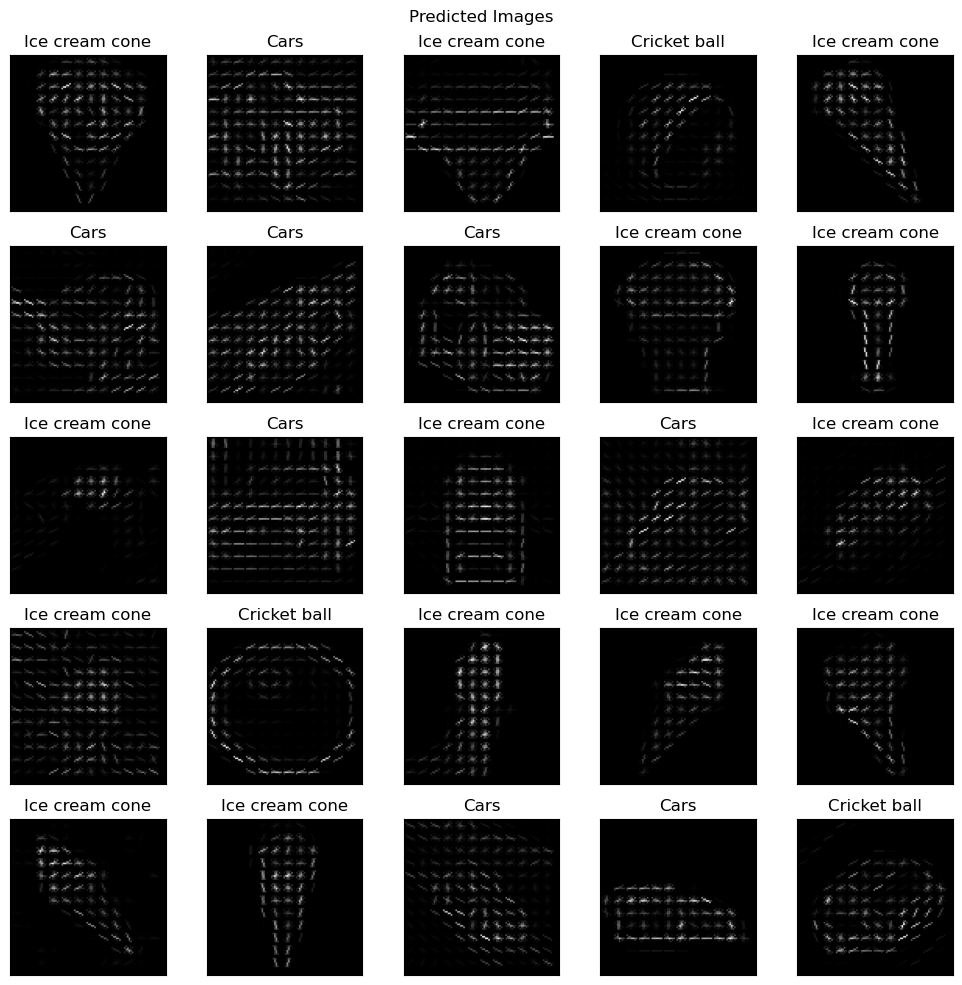

In [84]:
showGridImage(HogTestImages,predicted_labels,5,'Predicted Images')

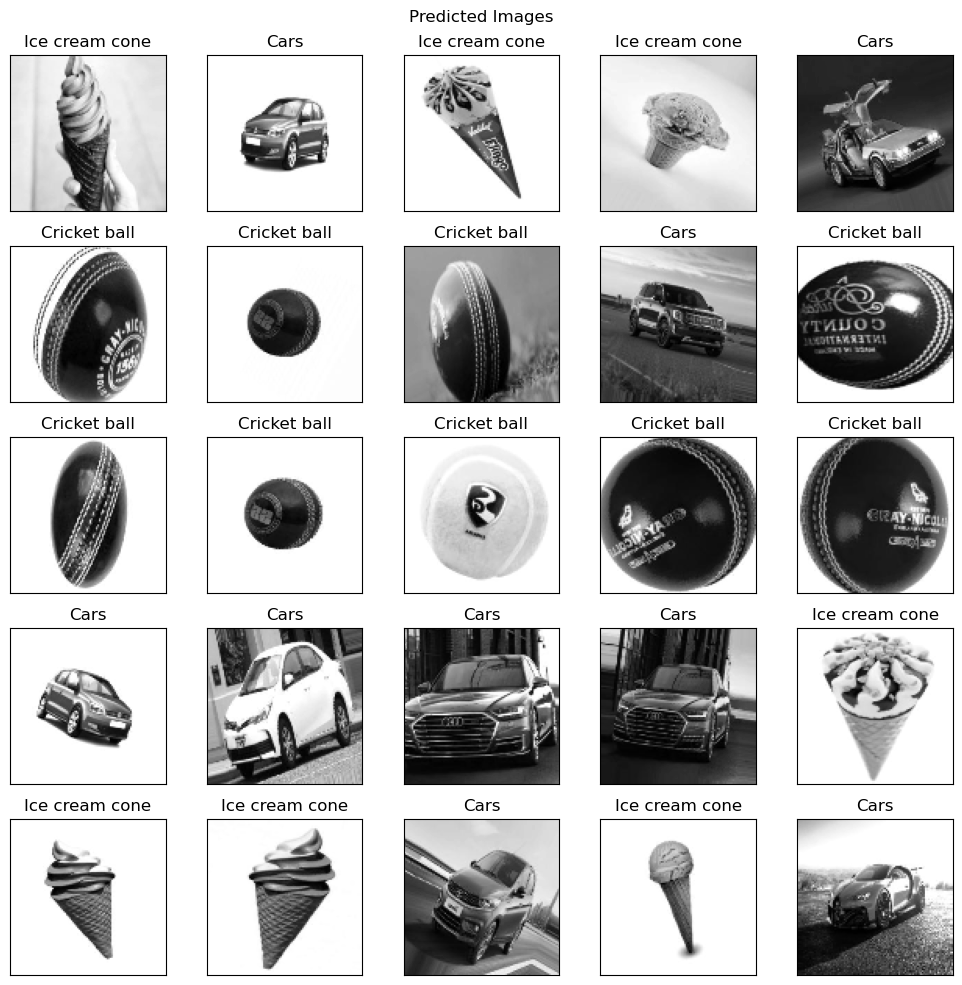

In [83]:
showGridImage(TestImages,predicted_labels,5,'Predicted Images')

## Performance Evaluation Matrix(Confusion matrix)
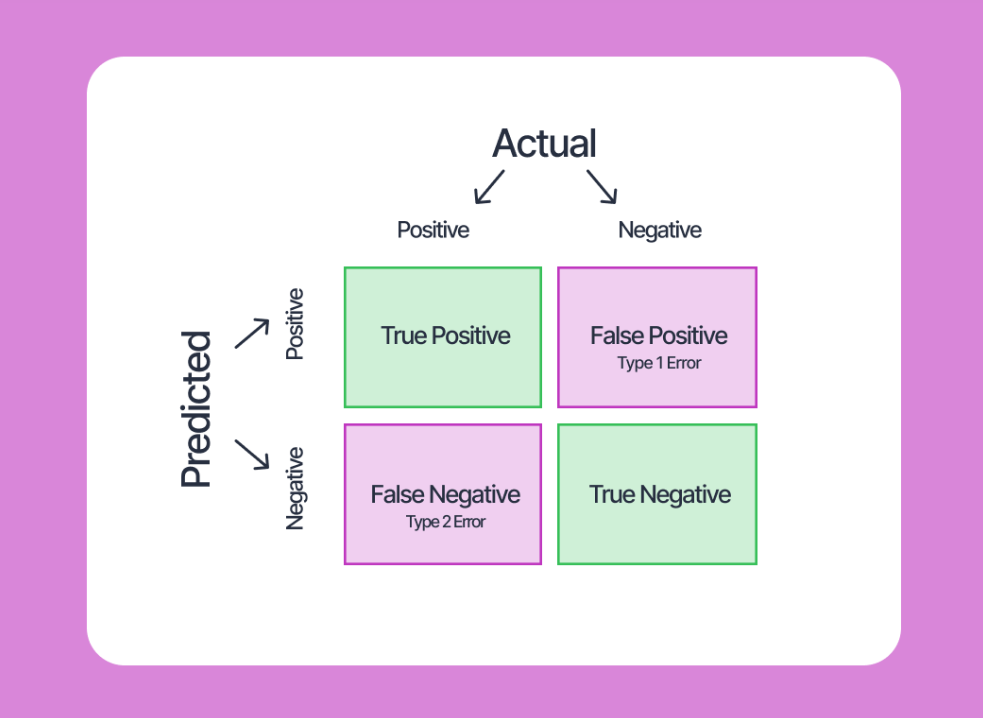

<Axes: >

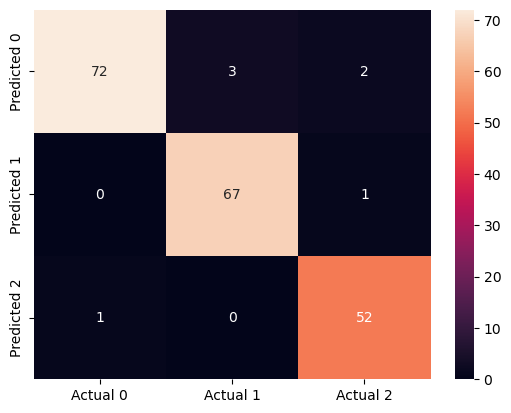

In [85]:
cmLogistic = confusion_matrix(TestLabels, predicted_labels)
sns.heatmap(cmLogistic, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])

# Creating More Dense Network

In [96]:
model = Sequential()
model.add(Dense(100, input_dim=8100, activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 100)               810100    
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 3)                 303       
                                                                 
Total params: 820,503
Trainable params: 820,503
Non-trainable params: 0
_________________________________________________________________


In [100]:
history = model.fit(xTrain, yTrain, epochs=20, batch_size=64, validation_data=(xTest, yTest))

ValueError: Data cardinality is ambiguous:
  x sizes: 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100
  y sizes: 789
Make sure all arrays contain the same number of samples.